In [57]:
import os
import sys
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stat
from copy import deepcopy
from scipy.io import savemat
sys.path.insert(0,'/Users/jakevogel/git/pycourse_vuMC/')
import pycourse_lesson3_4_scripts as us


In [206]:
sheet = '/Users/jakevogel/Science/tmp/tau/tau_lit_for_mm_jakerois1.csv'
orig_df = pandas.read_csv(sheet)
df = deepcopy(orig_df)
df.head()

,Unnamed: 0,RID,VISCODE,VISupdate,COLPROT,ORIGPROT,EXAMDATE,DX.bl,AGE,PTGENDER,...,n89_libmask_3,n89_libmask_4,n89_libmask_5,n89_libmask_6,n89_libmask_core_1,n89_libmask_core_2,n89_libmask_core_3,n89_libmask_core_4,n89_libmask_core_5,n89_libmask_core_6
0,0,112,bl,0.0,ADNI1,ADNI1,2/1/2006,LMCI,70.6,Male,...,1.287082,1.129728,1.227785,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968
1,1,112,m06,6.0,ADNI1,ADNI1,7/27/2006,LMCI,70.6,Male,...,1.287082,1.129728,1.227785,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968
2,2,112,m12,12.0,ADNI1,ADNI1,2/7/2007,LMCI,70.6,Male,...,1.287082,1.129728,1.227785,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968
3,3,112,m18,18.0,ADNI1,ADNI1,7/30/2007,LMCI,70.6,Male,...,1.287082,1.129728,1.227785,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968
4,4,112,m24,24.0,ADNI1,ADNI1,1/29/2008,LMCI,70.6,Male,...,1.287082,1.129728,1.227785,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968


In [207]:
df.RID = df.RID.astype('category')
df.PTGENDER = us.encode(df.PTGENDER).astype(int)
df.PTGENDER.head()

0    1
1    1
2    1
3    1
4    1
Name: PTGENDER, dtype: int64

In [208]:
# Create interactions
df.ix[:,'AgexTime'] = df.AGE * df.VISupdate
df.ix[:,'GendxTime'] = df.PTGENDER * df.VISupdate
df.ix[:,'EdxTime'] = df.PTEDUCAT * df.VISupdate
df.ix[:,'JTau_lib6xTime'] = df.libmask_tau_6 * df.VISupdate
df.columns[-6:]

Index(['n89_libmask_core_5', 'n89_libmask_core_6', 'AgexTime', 'GendxTime',
       'EdxTime', 'JTau_lib6xTime'],
      dtype='object')

In [209]:
# put together IVs and DV and gps
dv_col = 'MMSE'
gps_col = 'RID'
ivs_cols = []
ivs_cols = ['AGE','PTGENDER','PTEDUCAT','VISupdate','libmask_tau_6']
for col in df.columns:
    if 'xTime' in col:
        ivs_cols.append(col)

# make into a df
mmdf = pandas.DataFrame()
mmdf[dv_col] = df[dv_col]
mmdf[gps_col] = df[gps_col]
mmdf[ivs_cols] = df[ivs_cols]

mmdf.head()

,MMSE,RID,AGE,PTGENDER,PTEDUCAT,VISupdate,libmask_tau_6,AgexTime,GendxTime,EdxTime,JTau_lib6xTime
0,30.0,112,70.6,1,18.0,0.0,1.355319,0.0,0.0,0.0,0.000000
1,29.0,112,70.6,1,18.0,6.0,1.355319,423.6,6.0,108.0,8.131916
2,28.0,112,70.6,1,18.0,12.0,1.355319,847.2,12.0,216.0,16.263833
3,28.0,112,70.6,1,18.0,18.0,1.355319,1270.8,18.0,324.0,24.395749
4,29.0,112,70.6,1,18.0,24.0,1.355319,1694.4,24.0,432.0,32.527665


In [210]:
mmdf.dropna(inplace=True)
dv = mmdf[dv_col]
ivs = mmdf[ivs_cols]
gps = mmdf[gps_col]
tstmod = smf.MixedLM(dv,ivs,gps).fit()
tstmod.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: MMSE      
No. Observations:  575     Method:             REML      
No. Groups:        90      Scale:              2.0495    
Min. group size:   3       Likelihood:         -1184.5784
Max. group size:   13      Converged:          Yes       
Mean group size:   6.4                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
AGE             0.227    0.028  7.976 0.000  0.171  0.283
PTGENDER        0.806    0.286  2.822 0.005  0.246  1.366
PTEDUCAT        0.453    0.095  4.772 0.000  0.267  0.638
VISupdate       0.165    0.040  4.088 0.000  0.086  0.244
libmask_tau_6   2.951    1.338  2.205 0.027  0.328  5.574
AgexTime       -0.001    0.000 -2.105 0.035 -0.002 -0.000
GendxTime      -0.008    0.003 -2.901 0.004 -0.013 -0.003
EdxTime         0.002    0.001  1.950 0.051 -0.000  0.004
JTau_lib6xTime -0.109    0.013 -8.427 0.000 -0.134 -0.084
Group RE        6.505    0.812                           
=========================================================

"""

In [211]:
# Build function
def run_mm(dv_col,ivs_cols,gps_cols,data,tau_col=None,time_col=None):
    
    data = deepcopy(data)
    
    if time_col != None and tau_col == None:
        raise ValueError('time_col is only to be passed when tau_col is passed')
        
    if tau_col != None:
        ivs_cols.append(tau_col)
        data['%sxTime'%(tau_col)] = tau_col * time_col
        ivs_cols.append('%sxTime'%(tau_col))
        
        
    mmdf = pandas.DataFrame()
    mmdf[dv_col] = data[dv_col]
    mmdf[gps_col] = data[gps_col]
    mmdf[ivs_cols] = data[ivs_cols]
    mmdf.dropna(inplace=True)
    
    dv = mmdf[dv_col]
    ivs = mmdf[ivs_cols]
    gps = mmdf[gps_col]
    
   
    
    tstmod = smf.MixedLM(dv,ivs,gps).fit()

    return tstmod

In [212]:
# make another model
ivs_cols[4] = 'dkt_Cho_new_atlas_3.0'
df['Cho_roi4xTime'] = df['dkt_Cho_new_atlas_3.0'] * df.VISupdate
ivs_cols[-1] = 'Cho_roi4xTime'
ivs_cols


['AGE',
 'PTGENDER',
 'PTEDUCAT',
 'VISupdate',
 'dkt_Cho_new_atlas_3.0',
 'AgexTime',
 'GendxTime',
 'EdxTime',
 'Cho_roi4xTime']

In [213]:
tstmod_cho = run_mm(dv_col,ivs_cols,gps_col,df)
tstmod_cho.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:                MixedLM   Dependent Variable:   MMSE      
No. Observations:     575       Method:               REML      
No. Groups:           90        Scale:                2.0729    
Min. group size:      3         Likelihood:           -1188.2017
Max. group size:      13        Converged:            Yes       
Mean group size:      6.4                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
AGE                    0.231    0.028  8.187 0.000  0.176  0.287
PTGENDER               0.762    0.294  2.593 0.010  0.186  1.338
PTEDUCAT               0.467    0.095  4.895 0.000  0.280  0.653
VISupdate              0.148    0.040  3.682 0.000  0.069  0.226
dkt_Cho_new_atlas_3.0  2.626    1.312  2.001 0.045  0.054  5.197
AgexTime              -0.001    0.000 -1.928 0.054 -0.002  0.000
GendxTime             -0.006    0.003 -2.072 0.038 -0.011 -0.000
EdxTime                0.001    0.001  1.465 0.143 -0.000  0.003
Cho_roi4xTime         -0.098    0.012 -7.957 0.000 -0.122 -0.074
Group RE               6.631    0.822                           
================================================================

"""

In [214]:
# Compare model fit
from statsmodels.stats.anova import anova_lm

In [215]:
anova_lm(tstmod)

AttributeError: 'PandasData' object has no attribute 'design_info'

In [216]:
# Attempt #2

smf.mixedlm?


In [217]:
#vc = {'RID': '0 + C(RID)'}
tstmod2 = smf.mixedlm('MMSE ~ %s*%s + %s*%s + %s*%s + %s*%s'%
                         (ivs_cols[0],ivs_cols[3],
                         ivs_cols[1],ivs_cols[3],
                         ivs_cols[2],ivs_cols[3],
                         ivs_cols[4],ivs_cols[3]),
                          data=mmdf,groups='RID').fit()
tstmod2.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [218]:
    mmdf = pandas.DataFrame()
    mmdf[dv_col] = df[dv_col]
    mmdf[gps_col] = df[gps_col]
    mmdf[ivs_cols] = df[ivs_cols]
    mmdf.dropna(inplace=True)
    dv = mmdf[dv_col]
    ivs = mmdf[ivs_cols]
    gps = mmdf[gps_col]
    

In [49]:
# Now for some cross-sectional associations
cs = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')
cs.columns[-60:]

Index(['dkt_Braak_new_atlas_1', 'dkt_Braak_new_atlas_2',
       'dkt_Braak_new_atlas_3', 'dkt_Braak_new_atlas_4',
       'dkt_Braak_new_atlas_5', 'dkt_Braak_new_atlas_6', 'dkt_Braak_stage_1_1',
       'dkt_Braak_stage_2_2', 'dkt_Braak_stage_3_3', 'dkt_Braak_stage_4_4',
       'dkt_Braak_stage_5_5', 'dkt_Braak_stage_6_6', 'dkt_Cho_new_atlas_1',
       'dkt_Cho_new_atlas_2', 'dkt_Cho_new_atlas_3', 'dkt_Cho_new_atlas_4',
       'dkt_Cho_new_atlas_5', 'dkt_Cho_stage_1_1', 'dkt_Cho_stage_2_2',
       'dkt_Cho_stage_3_3', 'dkt_Cho_stage_4_4', 'dkt_Cho_stage_5_5',
       'inf_temp_1', 'schwarz_atlas_1', 'schwarz_atlas_2', 'schwarz_atlas_3',
       'schwarz_atlas_4', 'schwarz_atlas_5', 'schwarz_atlas_6',
       'schwarz_atlas_10', 'ADNI_MEM', 'ADNI_EF', 'n89_libmask_1',
       'n89_libmask_2', 'n89_libmask_3', 'n89_libmask_4', 'n89_libmask_5',
       'n89_libmask_6', 'n89_libmask_core_1', 'n89_libmask_core_2',
       'n89_libmask_core_3', 'n89_libmask_core_4', 'n89_libmask_core_5',
       'n89

In [50]:
ncols = [] 
for col in cs.columns:
    if '.' in col:
        ncols.append(col.split('.')[0])
    else:
        ncols.append(col)

cs.columns = ncols


In [51]:
taucols = cs.columns[-60:].tolist()
taucols.remove('ADNI_MEM')
taucols.remove('ADNI_EF')
taucols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'schwarz_atlas_10',
 'n89_libmask_1',
 'n89_libmask_2',
 'n89_libmask_3',
 'n89_libmask_4',
 'n89_libmask_5',
 'n89_libmask_6',
 'n89_libmask_core_1',
 'n89_libmask_core_2',
 'n89_libmask_core_3',
 'n89_libmask_core_4',
 'n89_libmask_core_5',
 'n89_libmask_core_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwar

In [13]:
#Build DF
csdf = pandas.DataFrame(index=taucols)

In [592]:
# First, just age:
for tcol in taucols:
    mod = smf.ols('AGE ~ %s'%(tcol),data=cs).fit()
    csdf.ix[tcol,'age_t'] = mod.tvalues[-1]
    csdf.ix[tcol,'age_p'] = mod.pvalues[-1]
    csdf.ix[tcol,'age_aic'] = mod.aic

In [593]:
csdf.sort_values('age_t')


,age_t,age_p,age_aic
n89_libmask_core_4,-1.686938,0.095157,582.370306
n89_libmask_1,-1.314888,0.191964,583.483594
dkt_Braak_new_atlas_6,-1.233904,0.220524,583.690870
dkt_Cho_new_atlas_5,-1.233904,0.220524,583.690870
n89_libmask_core_1,-1.124922,0.263681,583.949680
schwarz_atlas_6,-1.078920,0.283572,584.051954
n89_libmask_core_6,-0.737732,0.462640,584.679770
n89_libmask_6,-0.727484,0.468861,584.695033
schwarz_atlas_10,-0.725497,0.470072,584.697968
dkt_Cho_new_atlas_4,-0.533408,0.595096,584.944153


In [14]:
# Now the rest
#ivs_cols = ['AGE','PTGENDER','PTEDUCAT']
dv_cols = ['ADNI_EF','MMSE','ADNI_MEM']
for dv in dv_cols:
    for tcol in taucols:
        mod = smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + %s'%(dv,tcol),data=cs).fit()
        csdf.ix[tcol,'%s_t'%(dv)] = mod.tvalues[-1]
        csdf.ix[tcol,'%s_p'%(dv)] = mod.pvalues[-1]
        csdf.ix[tcol,'%s_aic'%(dv)] = mod.aic


In [15]:
csdf.sort_values('MMSE_t')

,ADNI_EF_t,ADNI_EF_p,ADNI_EF_aic,MMSE_t,MMSE_p,MMSE_aic,ADNI_MEM_t,ADNI_MEM_p,ADNI_MEM_aic
n89_libmask_core_5,-1.472805,0.144497,213.336543,-2.599372,0.011010,414.825020,-2.733481,0.007623,223.519236
brain_partition_core_ind_lund_sci5_scf5_4,-1.179992,0.241334,212.817516,-2.454128,0.016188,411.942544,-2.848801,0.005517,220.654252
n89_libmask_2,-1.110498,0.269916,214.308113,-2.316095,0.022961,416.201267,-1.343463,0.182698,229.211021
n89_libmask_5,-1.372269,0.173590,213.632351,-2.300989,0.023840,416.270759,-2.478598,0.015167,224.821573
n89_libmask_core_2,-1.230642,0.221851,214.015031,-2.231703,0.028266,416.584330,-0.894224,0.373727,230.259360
brain_partition_consensus_ind_lund_sci5_scf5_4,-0.949401,0.345140,213.330757,-2.223306,0.028880,413.016384,-2.547226,0.012681,222.240572
brain_partition_core_ind_lund_sci5_scf5_3,-1.375450,0.172649,212.298449,-1.998787,0.048865,413.970022,-2.301156,0.023860,223.421793
dkt_Cho_new_atlas_3,-1.311496,0.193222,213.801461,-1.967860,0.052344,417.699476,-2.193458,0.031005,226.146760
dkt_Cho_stage_3_3,-1.424463,0.157974,213.481269,-1.828874,0.070925,418.235456,-2.380984,0.019501,225.291208
brain_partition_consensus_ind_lund_sci5_scf5_3,-1.106613,0.271620,212.992566,-1.800650,0.075347,414.734704,-1.989118,0.049943,224.766196


In [72]:
to_mat

{'data': array([[ 0.9203086 ,  0.96361684,  0.97401717, ...,  1.01391003,
          1.03811568,  1.00150165],
        [ 1.46644933,  1.02297657,  1.42827974, ...,  1.66136473,
          1.54799546,  1.14530081],
        [ 1.74102651,  1.40763554,  1.64723928, ...,  2.13801682,
          2.12605061,  1.2506615 ],
        ..., 
        [ 1.51424601,  1.3530255 ,  1.3043234 , ...,  1.36384718,
          1.28522022,  1.11851879],
        [ 1.33256202,  1.31199292,  1.32262895, ...,  1.33310256,
          1.20251827,  1.13658192],
        [ 1.12827863,  1.33724906,  1.20094642, ...,  1.24705437,
          1.15054421,  1.11945742]]),
 'rois': ['dkt_Braak_new_atlas_1',
  'dkt_Braak_new_atlas_2',
  'dkt_Braak_new_atlas_3',
  'dkt_Braak_new_atlas_4',
  'dkt_Braak_new_atlas_5',
  'dkt_Braak_new_atlas_6',
  'dkt_Braak_stage_1_1',
  'dkt_Braak_stage_2_2',
  'dkt_Braak_stage_3_3',
  'dkt_Braak_stage_4_4',
  'dkt_Braak_stage_5_5',
  'dkt_Braak_stage_6_6',
  'dkt_Cho_new_atlas_1',
  'dkt_Cho_new_atla

In [78]:
# Convert to a matfile
dv_cols = ['ADNI_EF','MMSE','ADNI_MEM']
to_mat = {'data': cs[taucols+dv_cols].values, 'subs': cs.subs.tolist(), 'rois': taucols+dv_cols}
fname = '/Users/jakevogel/Science/tmp/tau/Yasser_matlab_scripts/taudata'
savemat(fname,to_mat)

In [61]:
savemat?

In [597]:
## ADD A COUPLE MORE ROIS
addf = pandas.ExcelFile('/Users/jakevogel/Science/tmp/tau/Lund/adniunmsk_lundrois.xls').parse('Sheet1')
jnk = []
for col in addf:
    if '.' in col:
        col = col.split('.')[0]
    jnk.append(col)
addf.columns = jnk
addf.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jakevogel/Science/tmp/tau/Lund/adniunmsk_lundrois.xls'

In [614]:
ncols = cs.columns.tolist()
ncols[:5] = ['s1','s2','s3','s4','s5']
cs.columns = ncols

In [615]:
cs.index = cs[:][cs.columns[2]].tolist()
cs.head()

,s1,s2,s3,s4,s5,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,n89_libmask_3,n89_libmask_4,n89_libmask_5,n89_libmask_6,n89_libmask_core_1,n89_libmask_core_2,n89_libmask_core_3,n89_libmask_core_4,n89_libmask_core_5,n89_libmask_core_6
002-S-4229,002-S-4229,002-S-4229,002-S-4229,002-S-4229,4229.0,2.0,ADNI2,ADNI2,2013-09-26,LMCI,...,1.047477,0.835154,1.053838,0.991677,0.893773,0.880805,1.054985,0.732637,1.106440,0.991884
002-S-4262,002-S-4262,002-S-4262,002-S-4262,002-S-4262,4262.0,2.0,ADNI2,ADNI2,2013-10-24,CN,...,1.416182,0.976500,1.720015,1.389680,1.040605,1.220127,1.423517,0.780044,1.900678,1.393055
002-S-4521,002-S-4521,002-S-4521,002-S-4521,002-S-4521,4521.0,2.0,ADNI2,ADNI2,2015-02-10,LMCI,...,1.753200,1.248272,2.307026,1.766849,1.210569,1.237361,1.659908,1.098936,2.762687,1.660848
002-S-4654,002-S-4654,002-S-4654,002-S-4654,002-S-4654,4654.0,2.0,ADNI2,ADNI2,2014-04-29,LMCI,...,1.365509,1.277891,1.288552,1.257984,1.136586,0.963367,1.379835,1.207780,1.387628,1.292713
002-S-4799,002-S-4799,002-S-4799,002-S-4799,002-S-4799,4799.0,2.0,ADNI2,ADNI2,2014-07-01,EMCI,...,1.208475,1.150512,1.200351,1.179942,0.833215,0.930503,1.215514,1.063067,1.288196,1.179371


In [ ]:
0.05/17

In [616]:
for sub in cs.index:
    for col in addf.columns:
        cs.ix[sub,col] = addf.ix[sub,col]
cs.head()

,s1,s2,s3,s4,s5,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,brain_partition_core_ind_lund_sci10_scf9_5,brain_partition_core_ind_lund_sci10_scf9_6,brain_partition_core_ind_lund_sci10_scf9_7,brain_partition_core_ind_lund_sci10_scf9_8,brain_partition_core_ind_lund_sci10_scf9_9,brain_partition_core_ind_lund_sci5_scf5_1,brain_partition_core_ind_lund_sci5_scf5_2,brain_partition_core_ind_lund_sci5_scf5_3,brain_partition_core_ind_lund_sci5_scf5_4,brain_partition_core_ind_lund_sci5_scf5_5
002-S-4229,002-S-4229,002-S-4229,002-S-4229,002-S-4229,4229.0,2.0,ADNI2,ADNI2,2013-09-26,LMCI,...,0.969284,1.018629,0.985322,0.940705,1.090985,0.435778,0.955747,1.018080,1.084029,0.983085
002-S-4262,002-S-4262,002-S-4262,002-S-4262,002-S-4262,4262.0,2.0,ADNI2,ADNI2,2013-10-24,CN,...,1.372568,1.000035,1.297416,1.290315,1.674069,0.467342,1.496535,1.697891,1.641258,1.091092
002-S-4521,002-S-4521,002-S-4521,002-S-4521,002-S-4521,4521.0,2.0,ADNI2,ADNI2,2015-02-10,LMCI,...,2.074551,1.310574,1.473601,1.631179,2.402867,0.854348,1.675856,2.225553,2.356193,1.193415
002-S-4654,002-S-4654,002-S-4654,002-S-4654,002-S-4654,4654.0,2.0,ADNI2,ADNI2,2014-04-29,LMCI,...,1.260419,1.208827,1.195553,1.376280,1.321537,0.936951,1.273935,1.377024,1.284608,1.147510
002-S-4799,002-S-4799,002-S-4799,002-S-4799,002-S-4799,4799.0,2.0,ADNI2,ADNI2,2014-07-01,EMCI,...,1.181757,1.103235,1.131687,1.237654,1.206735,0.769959,1.180966,1.223759,1.209287,1.076938


In [624]:
taucols = cs.columns[-84:]

In [625]:
# And run it
acsdf = pandas.DataFrame(index=taucols)
dv_cols = ['ADNI_EF','MMSE','ADNI_MEM']
for dv in dv_cols:
    for tcol in taucols:
        mod = smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + %s'%(dv,tcol),data=cs).fit()
        acsdf.ix[tcol,'%s_t'%(dv)] = mod.tvalues[-1]
        acsdf.ix[tcol,'%s_p'%(dv)] = mod.pvalues[-1]
        acsdf.ix[tcol,'%s_aic'%(dv)] = mod.aic

In [633]:
acsdf.sort_values('MMSE_t')

,ADNI_EF_t,ADNI_EF_p,ADNI_EF_aic,MMSE_t,MMSE_p,MMSE_aic,ADNI_MEM_t,ADNI_MEM_p,ADNI_MEM_aic
n89_libmask_core_5,-1.472805e+00,0.144497,213.336543,-2.599372,0.011010,414.825020,-2.733481e+00,0.007623,223.519236
brain_partition_core_ind_lund_sci10_scf9_9,-1.284388e+00,0.202496,213.874522,-2.566373,0.012029,414.992374,-3.102975e+00,0.002601,221.444452
brain_partition_core_ind_lund_sci5_scf5_4,-1.196546e+00,0.234811,214.101165,-2.450701,0.016308,415.564470,-2.912482e+00,0.004579,222.540955
brain_partition_consensus_ind_lund_sci10_scf9_5,-4.665112e-01,0.642043,215.374339,-2.376513,0.019724,415.919332,-2.158124e+00,0.033739,226.300974
n89_libmask_2,-1.110498e+00,0.269916,214.308113,-2.316095,0.022961,416.201267,-1.343463e+00,0.182698,229.211021
n89_libmask_5,-1.372269e+00,0.173590,213.632351,-2.300989,0.023840,416.270759,-2.478598e+00,0.015167,224.821573
n89_libmask_core_2,-1.230642e+00,0.221851,214.015031,-2.231703,0.028266,416.584330,-8.942241e-01,0.373727,230.259360
brain_partition_consensus_ind_lund_sci5_scf5_4,-9.671080e-01,0.336234,214.619573,-2.212827,0.029590,416.668285,-2.624038e+00,0.010300,224.091726
brain_partition_core_ind_lund_sci10_scf9_5,-5.441545e-01,0.587760,215.291502,-2.182903,0.031800,416.800069,-2.088785e+00,0.039718,226.597062
brain_partition_core_ind_lund_sci10_scf9_2,-1.461831e+00,0.147475,213.369800,-2.157282,0.033806,416.911630,-2.382093e+00,0.019446,225.285964


In [634]:
### LETS LOOK AT WHAT HAPPENS WHEN WE ADD AMYLOID INTERACTIONS OR IF WE LOOK IN ONLY AMYLOID+
# OR ONLY AMYLOID+ AND CONTROLS

# We'll start with just amyloid positives
apos = cs[cs.av45_status_wcb==1]

In [635]:
# And run it
apos_cs = pandas.DataFrame(index=taucols)
dv_cols = ['ADNI_EF','MMSE','ADNI_MEM']
for dv in dv_cols:
    for tcol in taucols:
        mod = smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + %s'%(dv,tcol),data=apos).fit()
        apos_cs.ix[tcol,'%s_t'%(dv)] = mod.tvalues[-1]
        apos_cs.ix[tcol,'%s_p'%(dv)] = mod.pvalues[-1]
        apos_cs.ix[tcol,'%s_aic'%(dv)] = mod.aic

In [642]:
apos_cs.sort_values('MMSE_t')

,ADNI_EF_t,ADNI_EF_p,ADNI_EF_aic,MMSE_t,MMSE_p,MMSE_aic,ADNI_MEM_t,ADNI_MEM_p,ADNI_MEM_aic
brain_partition_core_ind_lund_sci10_scf9_9,-4.603185e-01,0.648218,102.018590,-1.901135,0.065788,205.348562,-1.797752e+00,0.081102,115.121487
n89_libmask_core_5,-5.546725e-01,0.582749,101.909571,-1.846111,0.073598,205.562935,-1.595863e+00,0.119774,115.845839
n89_libmask_2,-1.539678e-01,0.878545,102.233707,-1.826345,0.076590,205.638684,-3.302453e-01,0.743241,118.538008
brain_partition_core_ind_lund_sci5_scf5_4,-3.480943e-01,0.729915,102.122148,-1.802158,0.080393,205.730468,-1.599802e+00,0.118895,115.832411
brain_partition_consensus_ind_lund_sci10_scf9_5,4.446251e-01,0.659408,102.034783,-1.794931,0.081559,205.757698,-1.300441e+00,0.202196,116.769765
n89_libmask_core_2,-3.990663e-01,0.692340,102.078643,-1.778056,0.084340,205.820924,-3.332273e-02,0.973612,118.661635
n89_libmask_5,-4.067551e-01,0.686737,102.071570,-1.698832,0.098485,206.111079,-1.264235e+00,0.214744,116.871361
brain_partition_core_ind_lund_sci10_scf9_5,4.181821e-01,0.678444,102.060811,-1.655477,0.107031,206.265147,-1.173054e+00,0.248927,117.115595
brain_partition_core_ind_lund_sci10_scf9_2,-5.910332e-01,0.558407,101.862244,-1.632047,0.111899,206.346994,-1.459935e+00,0.153487,116.291630
brain_partition_consensus_ind_lund_sci5_scf5_4,-1.476075e-01,0.883524,102.235906,-1.563257,0.127253,206.581512,-1.506641e+00,0.141138,116.142358


In [643]:
# Okay and finally lets try the interaction
# And run it
cs_int = pandas.DataFrame(index=taucols)
dv_cols = ['ADNI_EF','MMSE','ADNI_MEM']
for dv in dv_cols:
    for tcol in taucols:
        mod = smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + %s * av45_status_wcb'%(dv,tcol),data=cs).fit()
        cs_int.ix[tcol,'%s_t'%(dv)] = mod.tvalues[3]
        cs_int.ix[tcol,'%s_p'%(dv)] = mod.pvalues[3]
        cs_int.ix[tcol,'%s_int_t'%(dv)] = mod.tvalues[-1]
        cs_int.ix[tcol,'%s_int_p'%(dv)] = mod.pvalues[-1]
        cs_int.ix[tcol,'%s_aic'%(dv)] = mod.aic

In [ ]:
cs_int.sort_values('MMSE_t')

In [ ]:
# INTEGRATE INFORMATION TO LONGITUDINAL SPREADSHEET

In [662]:
ldf_u = deepcopy(df)

In [669]:
for i,row in ldf_u.iterrows():
    sub = ldf_u.ix[i,'PTID']
    if pandas.notnull(sub):
        sub = sub.replace('_','-')
        for col in cs.columns[-28:]: 
            ldf_u.ix[i,col] = cs.ix[sub,col]

In [671]:
ldf_u.to_csv('/Users/jakevogel/Science/tmp/tau/Lund_2save/longi_with_lund_ROIS_libmsk.csv')

In [631]:
## NOW BUILD THE LUND DATAFRAME
ltdf = pandas.ExcelFile('/Users/jakevogel/Science/tmp/tau/Lund/all_rois.xls').parse('Sheet1')
lddf = pandas.ExcelFile(
    '/Users/jakevogel/Science/tmp/tau/Lund/Tau_PET_clinical_data_Olof_S_FINAL.xlsx'
    ).parse('Sheet1')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jakevogel/Science/tmp/tau/Lund/all_rois.xls'

In [413]:
ltdf.index = [x.lower() for x in ltdf.index.tolist()]
lddf.index = [x.lower() for x in lddf.ix[:,lddf.columns[0]].tolist()]
print(ltdf.head())
print(lddf.head())

           dkt_Braak_new_atlas_1.0  dkt_Braak_new_atlas_2.0  \
tau-1003                  1.344503                 1.269826   
tau-1004                  0.973466                 1.060743   
taupet073                 1.457483                 0.958445   
taupet072                 1.624871                 0.947029   
taupet071                 1.442212                 0.882888   

           dkt_Braak_new_atlas_3.0  dkt_Braak_new_atlas_4.0  \
tau-1003                  1.193624                 1.179140   
tau-1004                  1.058470                 1.105787   
taupet073                 1.557190                 1.271524   
taupet072                 1.235772                 1.173138   
taupet071                 1.564595                 1.578354   

           dkt_Braak_new_atlas_5.0  dkt_Braak_new_atlas_6.0  \
tau-1003                  1.097541                 0.959840   
tau-1004                  1.122726                 1.076856   
taupet073                 1.153455                 1.

In [414]:
for i,sub in enumerate(lddf.index):
    if sub not in ltdf.index:
        print(i,sub)

15 taupet083
37 taupet151
87 taupet 177


In [415]:
#lddf.drop(lddf.index[[15,37]],axis=0,inplace=True)
nind = lddf.index.tolist()
nind[85] = 'taupet177'
lddf.index=nind

In [416]:
for sub in lddf.index.tolist():
    if sub in ltdf.index.tolist():
        for col in ltdf.columns:
            lddf.ix[sub,col] = ltdf.ix[sub,col]

In [417]:
ncols = lddf.columns.tolist()
ncols[1:8] = ['Dx','tau_date','Age','Sex','Education','MMSE','ADAS-3']
lddf.colums = ncols

In [418]:
xcols = []
for col in ncols:
    if '.' in col:
        ncol = col.split('.')[0]
        xcols.append(ncol)
    else:
        xcols.append(col)
lddf.columns = xcols

In [419]:
taucols = lddf.columns[8:].tolist()


In [420]:
dv_cols = ['MMSE','ADAS-3']
for col in dv_cols:
    for i,val in enumerate(lddf[col]):
        try:
            float(val)
        except:
            print(col,i,val)

MMSE 23 ND
ADAS-3 4 ND
ADAS-3 7 ND
ADAS-3 11 ND
ADAS-3 23 ND
ADAS-3 37 ND
ADAS-3 100 ND
ADAS-3 101 ND
ADAS-3 122 ND


In [421]:
dv_cols = ['MMSE']
lddf.drop(lddf.index[23],axis=0,inplace=True)

In [422]:
for sub in lddf.index:
    val = lddf.ix[sub,'Education']
    if not pandas.notnull(val):
        #lddf.drop(sub,axis=0,inplace=True)
        print(sub,val)

taupet009 nan
taupet036 nan
taupet097 nan
taupet169 nan


In [423]:
for sub in lddf.index:
    val = lddf.ix[sub,lddf.columns[8]]
    if not pandas.notnull(val):
        lddf.drop(sub,axis=0,inplace=True)
        


In [424]:
lddf.ix[:,'MMSE'] = lddf['MMSE'].astype(int)
lddf.dtypes

Tau_PET_ID                                                object
Dx                                                        object
tau_date                                          datetime64[ns]
Age                                                        int64
Sex                                                        int64
Education                                                float64
MMSE                                                       int64
ADAS-3                                                    object
dkt_Braak_new_atlas_1                                    float64
dkt_Braak_new_atlas_2                                    float64
dkt_Braak_new_atlas_3                                    float64
dkt_Braak_new_atlas_4                                    float64
dkt_Braak_new_atlas_5                                    float64
dkt_Braak_new_atlas_6                                    float64
dkt_Braak_stage_1_1                                      float64
dkt_Braak_stage_2_2      

In [444]:
lddf.index

Index(['taupet053', 'taupet056', 'taupet062', 'taupet063', 'taupet064',
       'taupet068', 'taupet069', 'taupet070', 'taupet071', 'taupet072',
       ...
       'taupet032', 'taupet302', 'taupet133', 'taupet161', 'taupet169',
       'taupet127', 'taupet095', 'taupet114', 'taupet116', 'taupet158'],
      dtype='object', length=123)

In [445]:
for sub in lddf.index.tolist():
    if not pandas.notnull(lddf.ix[sub,'Education']):
        lddf.drop(sub,axis=0,inplace=True)

In [446]:
#ivs_cols = ['Age','Sex','Eduation']

lcsdf = pandas.DataFrame(index=taucols)
for dv in dv_cols:
    for tcol in taucols:
        mod = smf.ols('%s ~ Age + Sex + Education + %s'%(dv,tcol),data=lddf).fit()
        lcsdf.ix[tcol,'%s_t'%(dv)] = mod.tvalues[-1]
        lcsdf.ix[tcol,'%s_p'%(dv)] = mod.pvalues[-1]
        lcsdf.ix[tcol,'%s_aic'%(dv)] = mod.aic

ValueError: zero-size array to reduction operation maximum which has no identity

In [447]:
lcsdf = pandas.DataFrame(index=taucols)
for dv_col in dv_cols:
    dv = lddf[dv_col]
    for tcol in taucols:
        iv_cols = ['Age','Sex','Education',tcol]
        ivs = lddf[iv_cols]
        ivs = api.add_constant(ivs)
        try:
            mod = smf.OLS(dv.dropna(),ivs.dropna(),hasconst=True).fit()
        except:
            continue
        lcsdf.ix[tcol,'%s_t'%(dv_col)] = mod.tvalues[-1]
        lcsdf.ix[tcol,'%s_p'%(dv_col)] = mod.pvalues[-1]
        lcsdf.ix[tcol,'%s_aic'%(dv_col)] = mod.aic

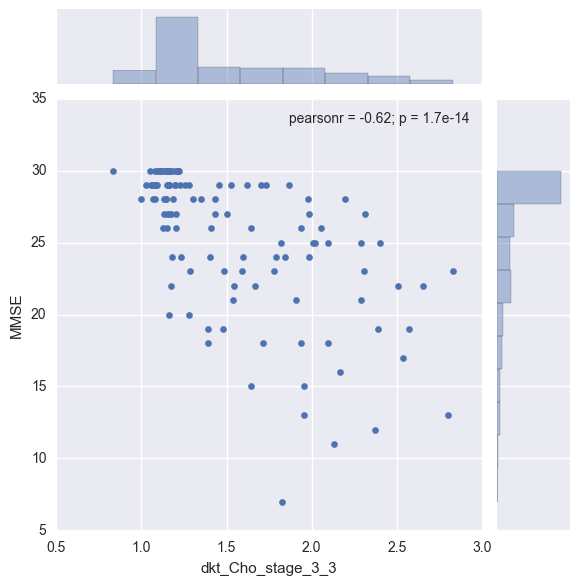

In [428]:
plt.close()
sns.jointplot('dkt_Cho_stage_3_3','MMSE',data=lddf)
plt.show()

In [449]:
lcsdf.sort_values('MMSE_t')

,MMSE_t,MMSE_p,MMSE_aic
dkt_Cho_stage_3_3,-7.780805,3.557148e-12,656.107565
inf_temp_1,-7.713652,5.028828e-12,656.819087
dkt_Cho_new_atlas_3,-7.641736,7.279238e-12,657.578921
dkt_Cho_stage_2_2,-7.635096,7.531716e-12,657.648962
brain_partition_consensus_ind_adni_sci5_scf6_6,-7.619740,8.149385e-12,657.810863
brain_partition_core_ind_adni_sci5_scf6_5,-7.559320,1.110747e-11,658.446862
dkt_Braak_new_atlas_1,-7.492693,1.561510e-11,659.146227
dkt_Braak_stage_1_1,-7.492693,1.561510e-11,659.146227
dkt_Cho_stage_1_1,-7.492693,1.561510e-11,659.146227
dkt_Cho_new_atlas_1,-7.492693,1.561510e-11,659.146227


In [ ]:
## Okay, lets look at some more ROI possibilities...

In [453]:
# First we have to get the new dataframe and integrate it..
ndf = pandas.ExcelFile('/Users/jakevogel/Science/tmp/tau/Lund/all_rois2.xls').parse('Sheet1')
ndf.index = [x.lower() for x in ndf.index.tolist()]
ndf.head()

,brain_partition_consensus_ind_lund_sci10_scf9_1.0,brain_partition_consensus_ind_lund_sci10_scf9_2.0,brain_partition_consensus_ind_lund_sci10_scf9_3.0,brain_partition_consensus_ind_lund_sci10_scf9_4.0,brain_partition_consensus_ind_lund_sci10_scf9_5.0,brain_partition_consensus_ind_lund_sci10_scf9_6.0,brain_partition_consensus_ind_lund_sci10_scf9_7.0,brain_partition_consensus_ind_lund_sci10_scf9_8.0,brain_partition_consensus_ind_lund_sci10_scf9_9.0,brain_partition_consensus_ind_lund_sci5_scf5_1.0,...,Schwarz_stage_3_3.0,Schwarz_stage_4_4.0,Schwarz_stage_5_5.0,Schwarz_stage_6_6.0,schwartz_atlas_1.0,schwartz_atlas_2.0,schwartz_atlas_3.0,schwartz_atlas_4.0,schwartz_atlas_5.0,schwartz_atlas_6.0
tau-1003,1.232144,1.304668,0.893389,1.040026,1.057268,1.116019,0.951435,1.294859,1.176866,1.232144,...,1.231621,1.210995,1.185656,1.173536,1.369024,1.158519,1.225782,1.199038,1.038007,1.045515
tau-1004,0.891697,1.144385,1.097960,1.091016,1.163034,1.137109,1.070917,1.062257,1.197044,0.891697,...,1.026263,1.075317,1.077488,1.076695,1.038848,0.843626,1.189305,1.103296,1.089647,1.067744
taupet073,0.756891,1.441366,0.947503,1.018139,1.043911,1.690476,1.021384,1.269245,1.388770,0.756891,...,1.217657,1.491270,1.426865,1.417550,1.472458,0.850868,1.423940,1.647766,1.052189,1.318698
taupet072,0.960235,1.428318,0.809161,0.868266,0.892233,1.203660,0.877323,1.283495,1.103400,0.960235,...,1.417814,1.415993,1.391811,1.354256,1.797308,1.019583,1.586866,1.414753,1.250708,0.958851
taupet071,0.830708,1.841503,1.136867,1.213457,1.525266,1.455583,1.495727,1.274009,1.648111,0.830708,...,1.314597,1.569781,1.629772,1.574527,1.666309,0.864160,1.547381,1.715711,1.976991,0.993041


In [454]:
ldf = deepcopy(lddf)

In [455]:
for i,sub in enumerate(ldf.index):
    if sub not in ndf.index:
        print(i,sub)

In [456]:
jnk = []
for col in ndf.columns:
    if '.' in col:
        col = col.split('.')[0]
        jnk.append(col)
    else:
        jnk.append(col)
ndf.columns = jnk

In [457]:
for sub in ldf.index.tolist():
    if sub in ndf.index.tolist():
        for col in ndf.columns:
            ldf.ix[sub,col] = ndf.ix[sub,col]

In [459]:
ldf.columns.tolist()

['Tau_PET_ID',
 'Dx',
 'tau_date',
 'Age',
 'Sex',
 'Education',
 'MMSE',
 'ADAS-3',
 'dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'l_inf_temp_7',
 'r_inf_temp_46',
 'Schwarz_stage_1_1',
 'Schwarz_stage_2_2',
 'Schwarz_stage_3_3',
 'Schwarz_stage_4_4',
 'Schwarz_stage_5_5',
 'Schwarz_stage_6_6',
 'schwartz_atlas_1',
 'schwartz_atlas_2',
 'schwartz_atlas_3',
 'schwartz_atlas_4',
 'schwartz_atlas_5',
 'schwartz_atlas_6',
 'brain_partition_consensus_ind_adni_sci5_scf6_1',
 'brain_partition_consensu

In [461]:
taucols = ldf.columns[8:]

In [462]:
## Now repeat the analysis
xcsdf = pandas.DataFrame(index=taucols)
for dv_col in dv_cols:
    dv = ldf[dv_col]
    for tcol in taucols:
        iv_cols = ['Age','Sex','Education',tcol]
        ivs = ldf[iv_cols]
        ivs = api.add_constant(ivs)
        try:
            mod = smf.OLS(dv.dropna(),ivs.dropna(),hasconst=True).fit()
        except:
            continue
        xcsdf.ix[tcol,'%s_t'%(dv_col)] = mod.tvalues[-1]
        xcsdf.ix[tcol,'%s_p'%(dv_col)] = mod.pvalues[-1]
        xcsdf.ix[tcol,'%s_aic'%(dv_col)] = mod.aic

In [463]:
xcsdf.sort_values('MMSE_t')

,MMSE_t,MMSE_p,MMSE_aic
brain_partition_core_ind_lund_sci5_scf5_3,-7.866590,2.282956e-12,655.195898
brain_partition_core_ind_lund_sci10_scf9_2,-7.860684,2.353824e-12,655.258750
dkt_Cho_stage_3_3,-7.780805,3.557148e-12,656.107565
brain_partition_consensus_ind_lund_sci10_scf9_2,-7.719287,4.884995e-12,656.759459
inf_temp_1,-7.713652,5.028828e-12,656.819087
Schwarz_stage_5_5,-7.667678,6.370826e-12,657.305088
Schwarz_stage_4_4,-7.656493,6.747814e-12,657.423192
dkt_Cho_new_atlas_3,-7.641736,7.279238e-12,657.578921
dkt_Cho_stage_2_2,-7.635096,7.531716e-12,657.648962
brain_partition_consensus_ind_adni_sci5_scf6_6,-7.619740,8.149385e-12,657.810863


In [ ]:
xcsdf.to_excel('/Users/jakevogel/Science/tmp/tau/Lund/Lund_cs_OLS_results')

In [564]:
# Lets repeat the analysis in the non-masked sample
tdf = pandas.ExcelFile('/Users/jakevogel/Science/tmp/tau/Lund/all_rois_unmsk.xls').parse('Sheet1')
tdf2 = pandas.ExcelFile('/Users/jakevogel/Science/tmp/tau/Lund/all_rois2_unmsk.xls').parse('Sheet1')
for sub in tdf.index:
    for col in tdf2.columns:
        tdf.ix[sub,col] = tdf2.ix[sub,col]
tdf.head()

,dkt_Braak_new_atlas_1.0,dkt_Braak_new_atlas_2.0,dkt_Braak_new_atlas_3.0,dkt_Braak_new_atlas_4.0,dkt_Braak_new_atlas_5.0,dkt_Braak_new_atlas_6.0,dkt_Braak_stage_1_1.0,dkt_Braak_stage_2_2.0,dkt_Braak_stage_3_3.0,dkt_Braak_stage_4_4.0,...,Schwarz_stage_3_3.0,Schwarz_stage_4_4.0,Schwarz_stage_5_5.0,Schwarz_stage_6_6.0,schwartz_atlas_1.0,schwartz_atlas_2.0,schwartz_atlas_3.0,schwartz_atlas_4.0,schwartz_atlas_5.0,schwartz_atlas_6.0
TAU-1003,1.271829,1.249521,1.154741,1.157273,1.094867,0.965777,1.271829,1.257897,1.181753,1.164963,...,1.227966,1.208733,1.183770,1.170624,1.367127,1.153899,1.221545,1.197959,1.035932,1.041928
TAU-1004,0.937323,1.054190,1.042757,1.081083,1.106675,1.069622,0.937323,1.010697,1.034378,1.066424,...,1.029184,1.074764,1.076766,1.075406,1.036517,0.841441,1.193499,1.099849,1.088160,1.061560
TauPET073,1.342631,0.977473,1.491278,1.211500,1.122101,1.050635,1.342631,1.113560,1.392448,1.268313,...,1.209957,1.492513,1.428395,1.417782,1.461935,0.842949,1.408989,1.648498,1.049254,1.313444
TauPET072,1.482568,0.949894,1.185367,1.129665,0.958654,0.839511,1.482568,1.148392,1.175705,1.144123,...,1.406268,1.408884,1.385667,1.346502,1.785054,1.007193,1.568232,1.410139,1.247954,0.964264
TauPET071,1.370297,0.903479,1.493805,1.490151,1.364137,1.247622,1.370297,1.077435,1.384859,1.457102,...,1.308581,1.567021,1.625954,1.566784,1.665398,0.856278,1.530017,1.709655,1.972645,0.989507


In [565]:
jnk = []
for col in tdf.columns:
    if '.' in col:
        col = col.split('.')[0]
    jnk.append(col)
tdf.columns = jnk
tdf.head()

,dkt_Braak_new_atlas_1,dkt_Braak_new_atlas_2,dkt_Braak_new_atlas_3,dkt_Braak_new_atlas_4,dkt_Braak_new_atlas_5,dkt_Braak_new_atlas_6,dkt_Braak_stage_1_1,dkt_Braak_stage_2_2,dkt_Braak_stage_3_3,dkt_Braak_stage_4_4,...,Schwarz_stage_3_3,Schwarz_stage_4_4,Schwarz_stage_5_5,Schwarz_stage_6_6,schwartz_atlas_1,schwartz_atlas_2,schwartz_atlas_3,schwartz_atlas_4,schwartz_atlas_5,schwartz_atlas_6
TAU-1003,1.271829,1.249521,1.154741,1.157273,1.094867,0.965777,1.271829,1.257897,1.181753,1.164963,...,1.227966,1.208733,1.183770,1.170624,1.367127,1.153899,1.221545,1.197959,1.035932,1.041928
TAU-1004,0.937323,1.054190,1.042757,1.081083,1.106675,1.069622,0.937323,1.010697,1.034378,1.066424,...,1.029184,1.074764,1.076766,1.075406,1.036517,0.841441,1.193499,1.099849,1.088160,1.061560
TauPET073,1.342631,0.977473,1.491278,1.211500,1.122101,1.050635,1.342631,1.113560,1.392448,1.268313,...,1.209957,1.492513,1.428395,1.417782,1.461935,0.842949,1.408989,1.648498,1.049254,1.313444
TauPET072,1.482568,0.949894,1.185367,1.129665,0.958654,0.839511,1.482568,1.148392,1.175705,1.144123,...,1.406268,1.408884,1.385667,1.346502,1.785054,1.007193,1.568232,1.410139,1.247954,0.964264
TauPET071,1.370297,0.903479,1.493805,1.490151,1.364137,1.247622,1.370297,1.077435,1.384859,1.457102,...,1.308581,1.567021,1.625954,1.566784,1.665398,0.856278,1.530017,1.709655,1.972645,0.989507


In [566]:
lddf = pandas.ExcelFile(
    '/Users/jakevogel/Science/tmp/tau/Lund/Tau_PET_clinical_data_Olof_S_FINAL.xlsx'
    ).parse('Sheet1')
tdf.index = [x.lower() for x in ltdf.index.tolist()]
lddf.index = [x.lower() for x in lddf.ix[:,lddf.columns[0]].tolist()]
print(ltdf.head())
print(lddf.head())

           dkt_Braak_new_atlas_1.0  dkt_Braak_new_atlas_2.0  \
tau-1003                  1.344503                 1.269826   
tau-1004                  0.973466                 1.060743   
taupet073                 1.457483                 0.958445   
taupet072                 1.624871                 0.947029   
taupet071                 1.442212                 0.882888   

           dkt_Braak_new_atlas_3.0  dkt_Braak_new_atlas_4.0  \
tau-1003                  1.193624                 1.179140   
tau-1004                  1.058470                 1.105787   
taupet073                 1.557190                 1.271524   
taupet072                 1.235772                 1.173138   
taupet071                 1.564595                 1.578354   

           dkt_Braak_new_atlas_5.0  dkt_Braak_new_atlas_6.0  \
tau-1003                  1.097541                 0.959840   
tau-1004                  1.122726                 1.076856   
taupet073                 1.153455                 1.

In [570]:
#for i,sub in enumerate(lddf.index):
#    if sub not in tdf.index:
#        print(i,sub)
        
#lddf.drop(lddf.index[[15,37]],axis=0,inplace=True)
#nind = lddf.index.tolist()
#nind[85] = 'taupet177'
#lddf.index=nind

#for sub in lddf.index.tolist():
#    if sub in tdf.index.tolist():
#        for col in tdf.columns:
#            lddf.ix[sub,col] = tdf.ix[sub,col]

ncols = lddf.columns.tolist()
ncols[1:8] = ['Dx','tau_date','Age','Sex','Education','MMSE','ADAS-3']
lddf.columns = ncols

In [573]:
#taucols = lddf.columns[8:].tolist()

#dv_cols = ['MMSE','ADAS-3']
#for col in dv_cols:
#    for i,val in enumerate(lddf[col]):
#        try:
#            float(val)
#        except:
#            print(col,i,val)

#dv_cols = ['MMSE']
lddf.drop(lddf.index[22],axis=0,inplace=True)

#for sub in lddf.index:
#    val = lddf.ix[sub,'Education']
#    if not pandas.notnull(val):
#        lddf.drop(sub,axis=0,inplace=True)
#        print(sub,val)

#for sub in lddf.index:
#    val = lddf.ix[sub,lddf.columns[8]]
#    if not pandas.notnull(val):
#        lddf.drop(sub,axis=0,inplace=True)
        
lddf.ix[:,'MMSE'] = lddf['MMSE'].astype(int)
lddf.dtypes

for sub in lddf.index.tolist():
    if not pandas.notnull(lddf.ix[sub,'Education']):
        lddf.drop(sub,axis=0,inplace=True)

In [575]:
#taucols

In [576]:
## Now repeat the analysis
ucsdf = pandas.DataFrame(index=taucols)
for dv_col in dv_cols:
    dv = lddf[dv_col]
    for tcol in taucols:
        iv_cols = ['Age','Sex','Education',tcol]
        ivs = lddf[iv_cols]
        ivs = api.add_constant(ivs)
        try:
            mod = smf.OLS(dv.dropna(),ivs.dropna(),hasconst=True).fit()
        except:
            continue
        ucsdf.ix[tcol,'%s_t'%(dv_col)] = mod.tvalues[-1]
        ucsdf.ix[tcol,'%s_p'%(dv_col)] = mod.pvalues[-1]
        ucsdf.ix[tcol,'%s_aic'%(dv_col)] = mod.aic

In [ ]:
ucsdf.sort_values('MMSE_t').to_excel('/home/jakevogel/tst.xls')

In [577]:
ucsdf.sort_values('MMSE_t')

,MMSE_t,MMSE_p,MMSE_aic
brain_partition_core_ind_lund_sci10_scf9_2,-8.162419,4.899401e-13,650.089001
brain_partition_core_ind_lund_sci5_scf5_3,-8.057600,8.465611e-13,651.214415
brain_partition_consensus_ind_lund_sci10_scf9_2,-8.036863,9.431021e-13,651.436593
dkt_Cho_stage_3_3,-7.990436,1.200751e-12,651.933444
dkt_Cho_new_atlas_3,-7.862950,2.326383e-12,653.293524
Schwarz_stage_5_5,-7.861856,2.339589e-12,653.305163
Schwarz_stage_4_4,-7.838622,2.638480e-12,653.552336
brain_partition_consensus_ind_lund_sci5_scf5_3,-7.815902,2.967364e-12,653.793822
Schwarz_stage_6_6,-7.810348,3.053772e-12,653.852825
brain_partition_consensus_ind_adni_sci5_scf4_4,-7.794981,3.306081e-12,654.016004


In [471]:
taucols[-9:-4]

Index(['brain_partition_core_ind_lund_sci5_scf5_1',
       'brain_partition_core_ind_lund_sci5_scf5_2',
       'brain_partition_core_ind_lund_sci5_scf5_3',
       'brain_partition_core_ind_lund_sci5_scf5_4',
       'brain_partition_core_ind_lund_sci5_scf5_5'],
      dtype='object')

In [497]:
jnk = {}
jnk.pop?

In [505]:
dv_col = 'MMSE'
cov_cols = ['Age', 'Sex', 'Education'] + taucols[-9:-4].tolist()
ts,ps,rsq,params = reduce_model(dv_col,cov_cols,ldf)


[1, 2, 3, 4, 5, 7, 8]
removing Age
removing Sex
removing Education
removing brain_partition_core_ind_lund_sci5_scf5_1
removing brain_partition_core_ind_lund_sci5_scf5_2
removing brain_partition_core_ind_lund_sci5_scf5_4
removing brain_partition_core_ind_lund_sci5_scf5_5
model could not be improved
tvalues: 
 const                                        4.567563
Age                                          0.177294
Sex                                          0.701177
Education                                    1.892338
brain_partition_core_ind_lund_sci5_scf5_1    1.157152
brain_partition_core_ind_lund_sci5_scf5_2    1.313042
brain_partition_core_ind_lund_sci5_scf5_3   -3.633438
brain_partition_core_ind_lund_sci5_scf5_4   -1.505418
brain_partition_core_ind_lund_sci5_scf5_5    0.227269
dtype: float64

pvalues: 
 const                                        0.000013
Age                                          0.859604
Sex                                          0.484673
Education      

In [504]:
### EXPLORE MULTIVARIATE STUFF ###

def reduce_model(dv_col,cov_cols,data):
    
    # prepare variables
    dv = data[dv_col]
    cov = data[cov_cols]
    cov = api.add_constant(cov)
    c_dict = dict((cov_cols.index(x)+1, x) for x in cov_cols)
    
    # evaluate model
    try:
        mod = smf.OLS(dv,cov,hasconst=True).fit()
    except:
        raise ValueError('model failed to run')
        
    rsq = mod.rsquared
    
    # improve model
    to_rem = []
    for i,p in enumerate(mod.pvalues[1:]):
        i = i+1
        if p > 0.05:
            to_rem.append(i)
    print(to_rem)
            
    if to_rem:
        for r in to_rem:
            print('removing %s'%(cov_cols[r-1]))
            c_dict.pop(r)
    
    # re-evaluate
    cov = data[list(c_dict.values())]
    cov = api.add_constant(cov)
    nmod = smf.OLS(dv,cov,hasconst=True).fit() 
    nrsq = nmod.rsquared
    
    improved = False
    if nrsq > rsq:
        print('model improved from %s to %s'%(rsq, nrsq))
        improved = True
        mod = nmod
    else:
        print('model could not be improved')
    
    print('tvalues: \n',mod.tvalues)
    print('\npvalues: \n',mod.pvalues)
    
    return mod.tvalues,mod.tvalues,mod.rsquared,c_dict.values()
    
    
    
    

In [311]:
# OKAY, NOW USE LUND CLUSTERS TO LOOK AT ADNI DATA

RangeIndex(start=0, stop=818, step=1)

In [16]:
#cs.index = cs.ix[:,cs.columns[0]]
#ntau = pandas.ExcelFile(
#        '/Users/jakevogel/Science/tmp/tau/Lund/ADNI_val/all_adni_rois.xls'
#        ).parse('Sheet1')
ntau = pandas.ExcelFile(
        '/Users/jakevogel/Science/tmp/tau/mskd/ADNI_val/all_adni_rois.xls'
        ).parse('Sheet1')

ntau.head()

,Schwarz_stage_1.nii.gz_1.0,Schwarz_stage_2.nii.gz_2.0,Schwarz_stage_3.nii.gz_3.0,Schwarz_stage_4.nii.gz_4.0,Schwarz_stage_5.nii.gz_5.0,Schwarz_stage_6.nii.gz_6.0,schwartz_atlas.nii.gz_1.0,schwartz_atlas.nii.gz_2.0,schwartz_atlas.nii.gz_3.0,schwartz_atlas.nii.gz_4.0,...,brain_partition_core_ind_lund_sci10_scf9.nii.gz_5.0,brain_partition_core_ind_lund_sci10_scf9.nii.gz_6.0,brain_partition_core_ind_lund_sci10_scf9.nii.gz_7.0,brain_partition_core_ind_lund_sci10_scf9.nii.gz_8.0,brain_partition_core_ind_lund_sci10_scf9.nii.gz_9.0,brain_partition_core_ind_lund_sci5_scf5.nii.gz_1.0,brain_partition_core_ind_lund_sci5_scf5.nii.gz_2.0,brain_partition_core_ind_lund_sci5_scf5.nii.gz_3.0,brain_partition_core_ind_lund_sci5_scf5.nii.gz_4.0,brain_partition_core_ind_lund_sci5_scf5.nii.gz_5.0
037-S-0377,1.350391,1.236912,1.265486,1.269975,1.248396,1.243669,1.350391,1.166428,1.304140,1.272271,...,1.052464,1.172598,1.079256,1.229777,1.228468,0.880077,1.067348,1.262414,1.201003,1.116522
018-S-4399,1.227428,1.211120,1.222992,1.175396,1.171536,1.161380,1.227428,1.200381,1.238707,1.149284,...,1.041848,1.066748,0.981667,1.207311,1.087456,0.984373,1.037634,1.176563,1.071861,0.986102
135-S-4309,1.243273,1.186863,1.219575,1.195105,1.188610,1.189876,1.243273,1.151512,1.263972,1.181611,...,1.062546,1.107581,1.110666,1.258093,1.084043,1.090761,1.147499,1.245739,1.089577,1.081231
037-S-4214,1.315477,1.107035,1.206476,1.112147,1.091055,1.080106,1.315477,0.978340,1.342711,1.060540,...,0.840749,0.966435,0.904644,1.038630,0.965403,0.597945,0.867174,1.102954,0.960926,0.917876
109-S-2200,1.132776,1.173919,1.148443,1.126790,1.112513,1.117237,1.132776,1.198522,1.112833,1.114850,...,0.985376,1.035126,0.945916,1.168796,1.037515,1.146524,1.036548,1.102904,0.997122,1.007069


In [17]:
ncols = []
for col in ntau.columns:
    if 'nii.gz' in col:
        x,z = col.split('.nii.gz')
        col = x+z
    if 'nii' in col:
        x,z = col.split('.nii')
        col = x+z
    if '.' in col:
        col = col.split('.')[0]
    ncols.append(col)
ntau.columns = ncols
ntau.columns

Index(['Schwarz_stage_1_1', 'Schwarz_stage_2_2', 'Schwarz_stage_3_3',
       'Schwarz_stage_4_4', 'Schwarz_stage_5_5', 'Schwarz_stage_6_6',
       'schwartz_atlas_1', 'schwartz_atlas_2', 'schwartz_atlas_3',
       'schwartz_atlas_4', 'schwartz_atlas_5', 'schwartz_atlas_6',
       'dkt_Braak_new_atlas_1', 'dkt_Braak_new_atlas_2',
       'dkt_Braak_new_atlas_3', 'dkt_Braak_new_atlas_4',
       'dkt_Braak_new_atlas_5', 'dkt_Braak_new_atlas_6', 'dkt_Braak_stage_1_1',
       'dkt_Braak_stage_2_2', 'dkt_Braak_stage_3_3', 'dkt_Braak_stage_4_4',
       'dkt_Braak_stage_5_5', 'dkt_Braak_stage_6_6', 'dkt_Cho_new_atlas_1',
       'dkt_Cho_new_atlas_2', 'dkt_Cho_new_atlas_3', 'dkt_Cho_new_atlas_4',
       'dkt_Cho_new_atlas_5', 'dkt_Cho_stage_1_1', 'dkt_Cho_stage_2_2',
       'dkt_Cho_stage_3_3', 'dkt_Cho_stage_4_4', 'dkt_Cho_stage_5_5',
       'brain_partition_consensus_ind_adni_sci5_scf6_1',
       'brain_partition_consensus_ind_adni_sci5_scf6_2',
       'brain_partition_consensus_ind_adni_sci5_

In [21]:
# save to

,Schwarz_stage_1_1,Schwarz_stage_2_2,Schwarz_stage_3_3,Schwarz_stage_4_4,Schwarz_stage_5_5,Schwarz_stage_6_6,schwartz_atlas_1,schwartz_atlas_2,schwartz_atlas_3,schwartz_atlas_4,...,brain_partition_core_ind_lund_sci10_scf9_5,brain_partition_core_ind_lund_sci10_scf9_6,brain_partition_core_ind_lund_sci10_scf9_7,brain_partition_core_ind_lund_sci10_scf9_8,brain_partition_core_ind_lund_sci10_scf9_9,brain_partition_core_ind_lund_sci5_scf5_1,brain_partition_core_ind_lund_sci5_scf5_2,brain_partition_core_ind_lund_sci5_scf5_3,brain_partition_core_ind_lund_sci5_scf5_4,brain_partition_core_ind_lund_sci5_scf5_5
037-S-0377,1.350391,1.236912,1.265486,1.269975,1.248396,1.243669,1.350391,1.166428,1.304140,1.272271,...,1.052464,1.172598,1.079256,1.229777,1.228468,0.880077,1.067348,1.262414,1.201003,1.116522
018-S-4399,1.227428,1.211120,1.222992,1.175396,1.171536,1.161380,1.227428,1.200381,1.238707,1.149284,...,1.041848,1.066748,0.981667,1.207311,1.087456,0.984373,1.037634,1.176563,1.071861,0.986102
135-S-4309,1.243273,1.186863,1.219575,1.195105,1.188610,1.189876,1.243273,1.151512,1.263972,1.181611,...,1.062546,1.107581,1.110666,1.258093,1.084043,1.090761,1.147499,1.245739,1.089577,1.081231
037-S-4214,1.315477,1.107035,1.206476,1.112147,1.091055,1.080106,1.315477,0.978340,1.342711,1.060540,...,0.840749,0.966435,0.904644,1.038630,0.965403,0.597945,0.867174,1.102954,0.960926,0.917876
109-S-2200,1.132776,1.173919,1.148443,1.126790,1.112513,1.117237,1.132776,1.198522,1.112833,1.114850,...,0.985376,1.035126,0.945916,1.168796,1.037515,1.146524,1.036548,1.102904,0.997122,1.007069
027-S-5277,1.560735,1.528839,1.424383,1.381452,1.362595,1.349373,1.560735,1.508092,1.279778,1.357835,...,1.120676,1.252385,1.081874,1.294240,1.225356,0.778203,1.089086,1.302959,1.231652,1.098440
037-S-5222,1.204981,1.118093,1.176731,1.229821,1.231088,1.230982,1.204981,1.064093,1.256850,1.258654,...,1.038670,1.256686,1.126701,1.255599,1.239718,1.099310,1.125297,1.239011,1.226372,1.168270
128-S-2002,1.030997,1.049622,1.072536,1.049303,1.047387,1.048142,1.030997,1.060526,1.103593,1.036517,...,0.959128,0.989075,0.994017,1.086599,1.054736,1.109015,0.906741,1.044829,1.028995,0.975197
127-S-5266,1.221299,1.257063,1.277684,1.203061,1.187918,1.178546,1.221299,1.278265,1.305382,1.162190,...,0.948924,1.034889,0.999078,1.268711,0.998269,0.880410,1.016676,1.193199,0.990634,1.006409
098-S-4003,1.145488,1.160973,1.167106,1.123379,1.107365,1.105921,1.145488,1.169828,1.174978,1.099390,...,0.930716,0.999593,0.989324,1.110864,1.021868,0.795095,0.924285,1.087069,1.008941,1.000883


In [22]:
cs = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')

In [24]:
for sub in cs.index:
    for col in ntau.columns:
        cs.ix[sub,col] = ntau.ix[sub,col]

In [34]:
taucols = cs.columns[-102:].tolist()

In [35]:
taucols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'schwarz_atlas_10',
 'ADNI_MEM',
 'ADNI_EF',
 'n89_libmask_1',
 'n89_libmask_2',
 'n89_libmask_3',
 'n89_libmask_4',
 'n89_libmask_5',
 'n89_libmask_6',
 'n89_libmask_core_1',
 'n89_libmask_core_2',
 'n89_libmask_core_3',
 'n89_libmask_core_4',
 'n89_libmask_core_5',
 'n89_libmask_core_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'S

In [36]:
# Now test...
#ivs_cols = ['AGE','PTGENDER','PTEDUCAT']
alcsdf = pandas.DataFrame(index=taucols)
dv_cols = ['ADNI_EF','MMSE','ADNI_MEM']
for dv in dv_cols:
    for tcol in taucols:
        mod = smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + %s'%(dv,tcol),data=cs).fit()
        alcsdf.ix[tcol,'%s_t'%(dv)] = mod.tvalues[-1]
        alcsdf.ix[tcol,'%s_p'%(dv)] = mod.pvalues[-1]
        alcsdf.ix[tcol,'%s_aic'%(dv)] = mod.aic

In [37]:
alcsdf.sort_values('MMSE_t')

,ADNI_EF_t,ADNI_EF_p,ADNI_EF_aic,MMSE_t,MMSE_p,MMSE_aic,ADNI_MEM_t,ADNI_MEM_p,ADNI_MEM_aic
n89_libmask_core_5,-1.472805e+00,0.144497,213.336543,-2.599372,0.011010,414.825020,-2.733481e+00,0.007623,223.519236
n89_libmask_2,-1.110498e+00,0.269916,214.308113,-2.316095,0.022961,416.201267,-1.343463e+00,0.182698,229.211021
n89_libmask_5,-1.372269e+00,0.173590,213.632351,-2.300989,0.023840,416.270759,-2.478598e+00,0.015167,224.821573
n89_libmask_core_2,-1.230642e+00,0.221851,214.015031,-2.231703,0.028266,416.584330,-8.942241e-01,0.373727,230.259360
schwartz_atlas_4,-2.320760e+00,0.022695,210.075122,-2.166810,0.033048,416.870280,4.566183e-01,0.649110,230.881582
brain_partition_consensus_ind_adni_sci5_scf6_2,-2.085292e+00,0.040042,211.114149,-2.135672,0.035583,417.004807,4.070001e-01,0.685031,230.926854
dkt_Braak_new_atlas_3,-2.167405e+00,0.033001,210.763087,-2.131777,0.035912,417.021512,5.179720e-01,0.605823,230.818447
dkt_Braak_stage_3_3,-2.173064e+00,0.032558,210.738446,-2.103355,0.038391,417.142574,4.513066e-01,0.652918,230.886675
dkt_Cho_stage_2_2,-2.037684e+00,0.044691,211.312085,-2.007676,0.047854,417.539322,3.687515e-01,0.713230,230.958215
dkt_Cho_new_atlas_2,-2.054662e+00,0.042983,211.241973,-2.006386,0.047994,417.544556,4.565114e-01,0.649187,230.881685


In [38]:
ncsdf = pandas.DataFrame(index=taucols)

In [39]:
jnk = []
for col in cs.columns:
    if '.' in col:
        jnk.append(col.split('.')[0])
    else:
        jnk.append(col)
cs.columns = jnk

In [44]:
taucols = cs.columns[-102:].tolist()
taucols.remove('ADNI_MEM')
taucols.remove('ADNI_EF')

In [45]:
taucols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'schwarz_atlas_10',
 'n89_libmask_1',
 'n89_libmask_2',
 'n89_libmask_3',
 'n89_libmask_4',
 'n89_libmask_5',
 'n89_libmask_6',
 'n89_libmask_core_1',
 'n89_libmask_core_2',
 'n89_libmask_core_3',
 'n89_libmask_core_4',
 'n89_libmask_core_5',
 'n89_libmask_core_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwar

In [46]:
# Now the test
#ivs_cols = ['AGE','PTGENDER','PTEDUCAT']
dv_cols = ['ADNI_EF','MMSE','ADNI_MEM']
for dv in dv_cols:
    for tcol in taucols:
        mod = smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + %s'%(dv,tcol),data=cs).fit()
        ncsdf.ix[tcol,'%s_t'%(dv)] = mod.tvalues[-1]
        ncsdf.ix[tcol,'%s_p'%(dv)] = mod.pvalues[-1]
        ncsdf.ix[tcol,'%s_aic'%(dv)] = mod.aic

In [47]:
ncsdf.sort_values('MMSE_t')

,ADNI_EF_t,ADNI_EF_p,ADNI_EF_aic,MMSE_t,MMSE_p,MMSE_aic,ADNI_MEM_t,ADNI_MEM_p,ADNI_MEM_aic
n89_libmask_core_5,-1.472805,0.144497,213.336543,-2.599372,0.011010,414.825020,-2.733481,0.007623,223.519236
n89_libmask_2,-1.110498,0.269916,214.308113,-2.316095,0.022961,416.201267,-1.343463,0.182698,229.211021
n89_libmask_5,-1.372269,0.173590,213.632351,-2.300989,0.023840,416.270759,-2.478598,0.015167,224.821573
n89_libmask_core_2,-1.230642,0.221851,214.015031,-2.231703,0.028266,416.584330,-0.894224,0.373727,230.259360
schwartz_atlas_4,-2.320760,0.022695,210.075122,-2.166810,0.033048,416.870280,0.456618,0.649110,230.881582
brain_partition_consensus_ind_adni_sci5_scf6_2,-2.085292,0.040042,211.114149,-2.135672,0.035583,417.004807,0.407000,0.685031,230.926854
dkt_Braak_new_atlas_3,-2.167405,0.033001,210.763087,-2.131777,0.035912,417.021512,0.517972,0.605823,230.818447
dkt_Braak_stage_3_3,-2.173064,0.032558,210.738446,-2.103355,0.038391,417.142574,0.451307,0.652918,230.886675
dkt_Cho_stage_2_2,-2.037684,0.044691,211.312085,-2.007676,0.047854,417.539322,0.368751,0.713230,230.958215
dkt_Cho_new_atlas_2,-2.054662,0.042983,211.241973,-2.006386,0.047994,417.544556,0.456511,0.649187,230.881685
